In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.read_csv('ExperimentBase_p_0.01.csv').iloc[:,1] #probability
pd.read_csv('ExperimentBase_p_0.01.csv').iloc[:,4] #maximum coverage per contract
pd.read_csv('ExperimentBase_p_0.01.csv').iloc[:,7] #in-sample expected indemnity
pd.read_csv('ExperimentBase_p_0.01.csv').iloc[:,8] #CVaR 95%

0    0.000000e+00
1    0.000000e+00
2    0.000000e+00
3    3.653580e-09
4    0.000000e+00
5    0.000000e+00
Name: CVaR, dtype: float64

In [2]:
index = ['Unique', 'Smoker', 'Non-Smoker', 'Non-Smoker C0', 'Smoker and Non-obese C1', 'Smoker and Obese C2']

In [4]:
pd.read_csv('ExperimentBase_p_0.1.csv')

,Time,Probability,RiskPremium,T0,T1,T2,Z,Expected,CVaR
0,3.200092,0.1,5.069729,1.0,9.703714,9.703714,1.122882,2.027892,9.703714
1,1.629042,0.1,20.797115,1.0,48.199383,48.199383,5.759869,8.318846,35.192444
2,1.809982,0.1,3.694540,1.0,7.297831,7.297831,0.761720,1.477816,7.297831
3,5.987156,0.1,3.526796,1.0,6.782681,6.782681,0.773086,1.410718,6.782681
4,4.259807,0.1,10.851751,1.0,18.957881,18.957881,2.856755,4.340700,18.957881
5,1.019581,0.1,26.230581,1.0,40.964799,40.964799,8.120207,10.492232,40.964799


In [5]:
i=1
for p in np.round(np.arange(0.01,0.5,0.01), 2).astype('str'):
    exec(f'coverage_{i} = pd.read_csv("ExperimentBase_p_{p}.csv").iloc[:,4]')
    i=i+1
    
i=1
for p in np.round(np.arange(0.01,0.5,0.01), 2).astype('str'):
    exec(f'z_{i} = pd.read_csv("ExperimentBase_p_{p}.csv").iloc[:,6]')
    i=i+1
    
i=1
for p in np.round(np.arange(0.01,0.5,0.01), 2).astype('str'):
    exec(f'expected_{i} = pd.read_csv("ExperimentBase_p_{p}.csv").iloc[:,7]')
    i=i+1
    
i=1
for p in np.round(np.arange(0.01,0.5,0.01), 2).astype('str'):
    exec(f'cvar_{i} = pd.read_csv("ExperimentBase_p_{p}.csv").iloc[:,2]')
    i=i+1

In [6]:
i=3
coverage = pd.concat([coverage_1, coverage_2], axis=1)
for p in np.round(np.arange(0.03,0.5,0.01), 2).astype('str'):
    exec(f'coverage = pd.concat([coverage, coverage_{i}], axis=1)')
    i=i+1
    
i=3
expected = pd.concat([expected_1, expected_2], axis=1)
for p in np.round(np.arange(0.03,0.5,0.01), 2).astype('str'):
    exec(f'expected = pd.concat([expected, expected_{i}], axis=1)')
    i=i+1
    
i=3
cvar = pd.concat([cvar_1, cvar_2], axis=1)
for p in np.round(np.arange(0.03,0.5,0.01), 2).astype('str'):
    exec(f'cvar = pd.concat([cvar, cvar_{i}], axis=1)')
    i=i+1
    
i=3
z = pd.concat([z_1, z_2], axis=1)
for p in np.round(np.arange(0.03,0.5,0.01), 2).astype('str'):
    exec(f'z = pd.concat([z, z_{i}], axis=1)')
    i=i+1

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Scenario Base

In [106]:
HyperP = {}
HyperP["N"] = 3
HyperP["α"] = 0.95
HyperP["λ"] = 0.25
HyperP["τ"] = 2.5
HyperP["Ti"] = 1.0
HyperP["Tf"] = 2.0
HyperP["M"] = [1e8, 1e8, 1e8]
HyperP["p"] = 0.1
HyperP["Sample size"] = 700

In [107]:
params = pd.DataFrame(HyperP).T.iloc[:,0:1].astype('str')
definition = pd.DataFrame(['Number of accidents', 'CVaR Quantil', 'CVaR Weight in Z',
                           'Risk-loading factor', 'Minimum indemnization',
                           'Maximum indemnization', 'Big M', 'Probability of accidents',
                           'Sample size'])
Table = pd.concat([params.reset_index(), definition], axis=1)
Table.columns = ['HyperParameter', 'Value', 'Definition']
Table = Table.set_index('HyperParameter')

Table

,Value,Definition
HyperParameter,,
N,3.0,Number of accidents
α,0.95,CVaR Quantil
λ,0.25,CVaR Weight in Z
τ,2.5,Risk-loading factor
Ti,1.0,Minimum indemnization
Tf,2.0,Maximum indemnization
M,100000000.0,Big M
p,0.1,Probability of accidents
Sample size,700.0,Sample size


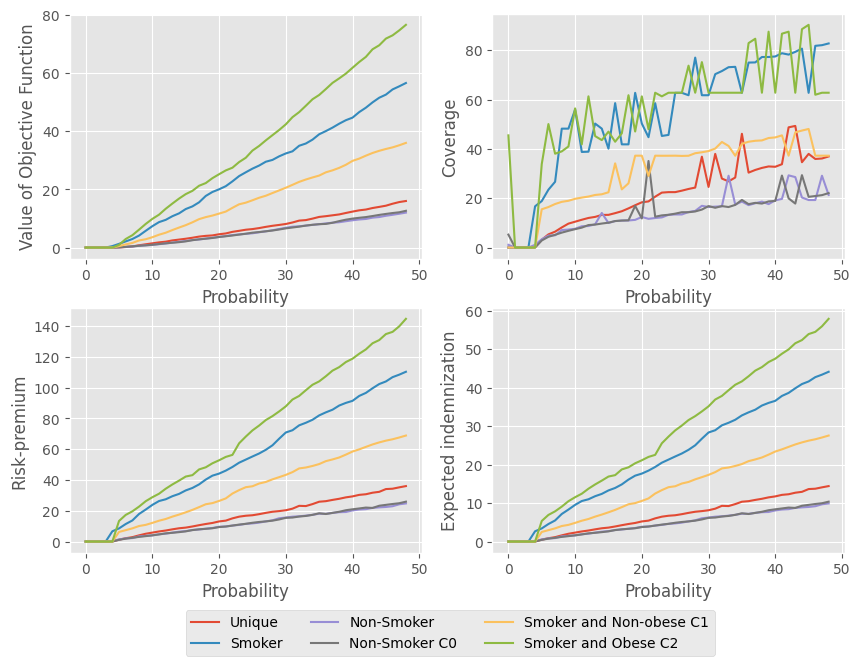

In [8]:
fig, axs = plt.subplots(2,2, figsize=(10,7))

for i in range(6):
    axs[0,1].plot(coverage.values.T[:,i], label = index[i])

axs[0,1].set(xlabel='Probability', ylabel='Coverage')

for i in range(6):
    axs[0,0].plot(z.values.T[:,i], label = index[i])
axs[0,0].set(xlabel='Probability', ylabel='Value of Objective Function')

for i in range(6):
    axs[1,0].plot(cvar.values.T[:,i], label = index[i])
axs[1,0].set(xlabel='Probability', ylabel='Risk-premium')

for i in range(6):
    axs[1,1].plot(expected.values.T[:,i], label = index[i])
axs[1,1].set(xlabel='Probability', ylabel='Expected indemnization')
axs[1,1].legend(ncols=3, loc='lower center', bbox_to_anchor=(-0.12, -0.45))

In [9]:
pd.read_csv("ExperimentBase_Ti_2.0.csv").iloc[:,4]

0     8.601229
1    34.192445
2     6.116447
3     5.782681
4    17.957881
5    44.968517
Name: T1, dtype: float64

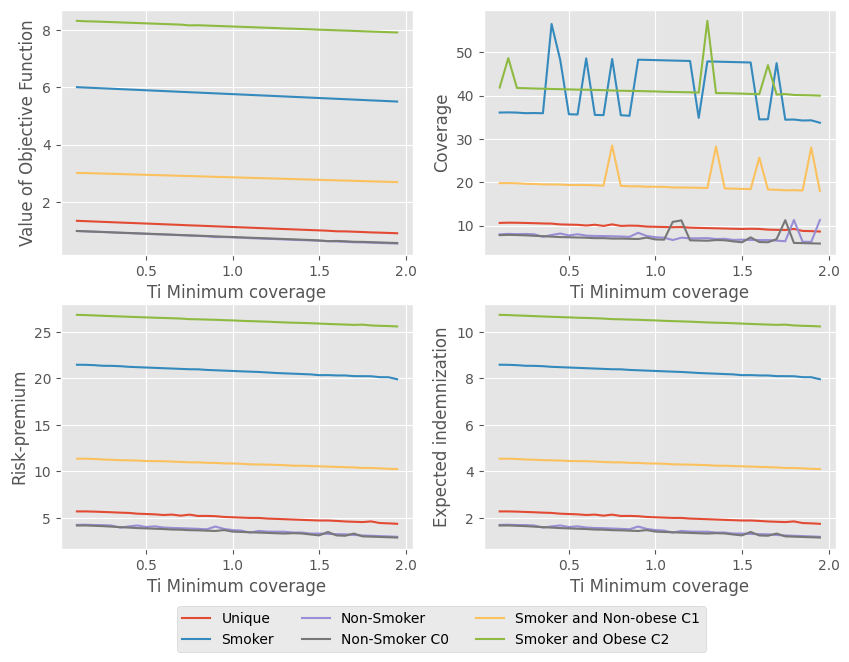

In [10]:
i=1
for Ti in np.round(np.arange(0.1,2.0,0.05), 2).astype('str'):
    exec(f'coverage_{i} = pd.read_csv("ExperimentBase_Ti_{Ti}.csv").iloc[:,4]')
    i=i+1
    
i=1
for Ti in np.round(np.arange(0.1,2.0,0.05), 2).astype('str'):
    exec(f'z_{i} = pd.read_csv("ExperimentBase_Ti_{Ti}.csv").iloc[:,6]')
    i=i+1
    
i=1
for Ti in np.round(np.arange(0.1,2.0,0.05), 2).astype('str'):
    exec(f'expected_{i} = pd.read_csv("ExperimentBase_Ti_{Ti}.csv").iloc[:,7]')
    i=i+1
    
i=1
for Ti in np.round(np.arange(0.1,2.0,0.05), 2).astype('str'):
    exec(f'cvar_{i} = pd.read_csv("ExperimentBase_Ti_{Ti}.csv").iloc[:,2]')
    i=i+1

# Vectors    
i=3
coverage = pd.concat([coverage_1, coverage_2], axis=1)
for p in np.round(np.arange(0.2,2.0,0.05), 2).astype('str'):
    exec(f'coverage = pd.concat([coverage, coverage_{i}], axis=1)')
    i=i+1
    
i=3
expected = pd.concat([expected_1, expected_2], axis=1)

for p in np.round(np.arange(0.2,2.0,0.05), 2).astype('str'):
    exec(f'expected = pd.concat([expected, expected_{i}], axis=1)')
    i=i+1
    
i=3
cvar = pd.concat([cvar_1, cvar_2], axis=1)
for p in np.round(np.arange(0.2,2.0,0.05), 2).astype('str'):
    exec(f'cvar = pd.concat([cvar, cvar_{i}], axis=1)')
    i=i+1
    
i=3
z = pd.concat([z_1, z_2], axis=1)
for p in np.round(np.arange(0.2,2.0,0.05), 2).astype('str'):
    exec(f'z = pd.concat([z, z_{i}], axis=1)')
    i=i+1
    
fig, axs = plt.subplots(2,2, figsize=(10,7))

for i in range(6):
    axs[0,1].plot(np.arange(0.1,2.0,0.05), coverage.values.T[:,i], label = index[i])

axs[0,1].set(xlabel='Ti Minimum coverage', ylabel='Coverage')

for i in range(6):
    axs[0,0].plot(np.arange(0.1,2.0,0.05), z.values.T[:,i], label = index[i])
    
axs[0,0].set(xlabel='Ti Minimum coverage', ylabel='Value of Objective Function')

for i in range(6):
    axs[1,0].plot(np.arange(0.1,2.0,0.05), cvar.values.T[:,i], label = index[i])
axs[1,0].set(xlabel='Ti Minimum coverage', ylabel='Risk-premium')

for i in range(6):
    axs[1,1].plot(np.arange(0.1,2.0,0.05), expected.values.T[:,i], label = index[i])
axs[1,1].set(xlabel='Ti Minimum coverage', ylabel='Expected indemnization')
axs[1,1].legend(ncols=3, loc='lower center', bbox_to_anchor=(-0.12, -0.45))

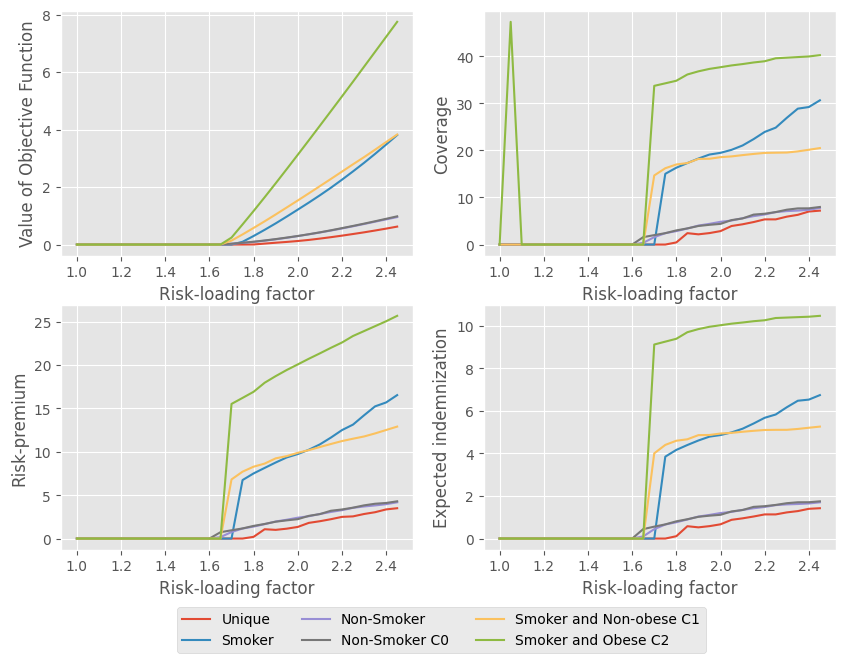

In [14]:
i=1
for Tao in np.round(np.arange(1.0,2.5,0.05), 2).astype('str'):
    exec(f'coverage_{i} = pd.read_csv("ExperimentBase_lf_{Tao}.csv").iloc[:,4]')
    i=i+1
    
i=1
for Tao in np.round(np.arange(1.0,2.5,0.05), 2).astype('str'):
    exec(f'z_{i} = pd.read_csv("ExperimentBase_lf_{Tao}.csv").iloc[:,6]')
    i=i+1
    
i=1
for Tao in np.round(np.arange(1.0,2.5,0.05), 2).astype('str'):
    exec(f'expected_{i} = pd.read_csv("ExperimentBase_lf_{Tao}.csv").iloc[:,7]')
    i=i+1
    
i=1
for Tao in np.round(np.arange(1.0,2.5,0.05), 2).astype('str'):
    exec(f'cvar_{i} = pd.read_csv("ExperimentBase_lf_{Tao}.csv").iloc[:,2]')
    i=i+1

# Vectors    
i=3
coverage = pd.concat([coverage_1, coverage_2], axis=1)
for p in np.round(np.arange(1.1,2.5,0.05), 2).astype('str'):
    exec(f'coverage = pd.concat([coverage, coverage_{i}], axis=1)')
    i=i+1
    
i=3
expected = pd.concat([expected_1, expected_2], axis=1)

for p in np.round(np.arange(1.1,2.5,0.05), 2).astype('str'):
    exec(f'expected = pd.concat([expected, expected_{i}], axis=1)')
    i=i+1
    
i=3
cvar = pd.concat([cvar_1, cvar_2], axis=1)
for p in np.round(np.arange(1.1,2.5,0.05), 2).astype('str'):
    exec(f'cvar = pd.concat([cvar, cvar_{i}], axis=1)')
    i=i+1
    
i=3
z = pd.concat([z_1, z_2], axis=1)
for p in np.round(np.arange(1.1,2.5,0.05), 2).astype('str'):
    exec(f'z = pd.concat([z, z_{i}], axis=1)')
    i=i+1
    
fig, axs = plt.subplots(2,2, figsize=(10,7))

for i in range(6):
    axs[0,1].plot(np.arange(1.0,2.5,0.05), coverage.values.T[:,i], label = index[i])

axs[0,1].set(xlabel='Risk-loading factor', ylabel='Coverage')

for i in range(6):
    axs[0,0].plot(np.arange(1.0,2.5,0.05), z.values.T[:,i], label = index[i])
    
axs[0,0].set(xlabel='Risk-loading factor', ylabel='Value of Objective Function')

for i in range(6):
    axs[1,0].plot(np.arange(1.0,2.5,0.05), cvar.values.T[:,i], label = index[i])
axs[1,0].set(xlabel='Risk-loading factor', ylabel='Risk-premium')

for i in range(6):
    axs[1,1].plot(np.arange(1.0,2.5,0.05), expected.values.T[:,i], label = index[i])
axs[1,1].set(xlabel='Risk-loading factor', ylabel='Expected indemnization')
axs[1,1].legend(ncols=3, loc='lower center', bbox_to_anchor=(-0.12, -0.45))

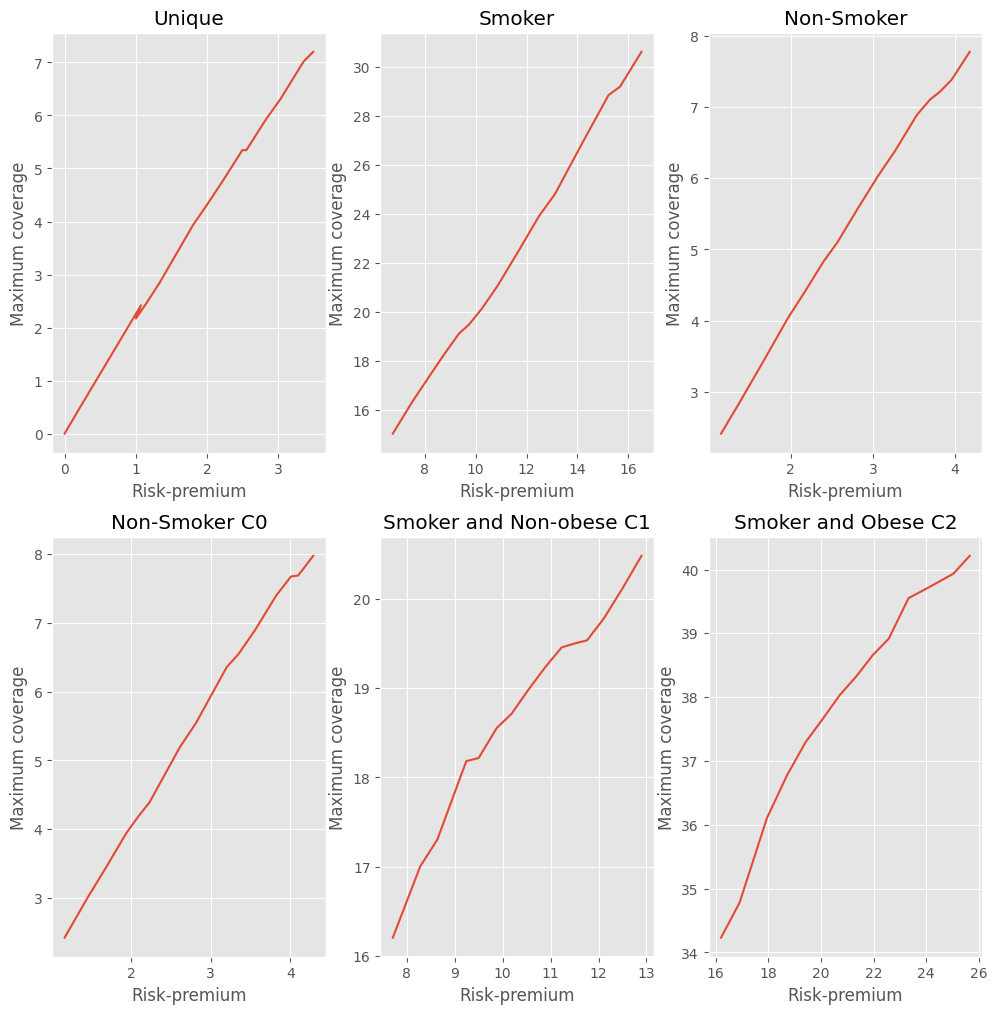

In [15]:
fig, axs = plt.subplots(2,3, figsize=(12,12))

axs[0,0].plot(cvar.values.T[:,0][15:30], coverage.values.T[:,0][15:30])
axs[0,0].set_title(index[0])
axs[0,1].plot(cvar.values.T[:,1][15:30], coverage.values.T[:,1][15:30])
axs[0,1].set_title(index[1])
axs[0,2].plot(cvar.values.T[:,2][15:30], coverage.values.T[:,2][15:30])
axs[0,2].set_title(index[2])
axs[1,0].plot(cvar.values.T[:,3][15:30], coverage.values.T[:,3][15:30])
axs[1,0].set_title(index[3])
axs[1,1].plot(cvar.values.T[:,4][15:30], coverage.values.T[:,4][15:30])
axs[1,1].set_title(index[4])
axs[1,2].plot(cvar.values.T[:,5][15:30], coverage.values.T[:,5][15:30])
axs[1,2].set_title(index[5])

for ax in axs.flat:
    ax.set(xlabel='Risk-premium', ylabel='Maximum coverage')

The supply curve is composed by firms with different levels of risk-loading factors. In general, a greater risk-premium needs to be charged to the insured in order to increase the maximum coverage. A generous contract is necesarily expensive. The risk-premium is the contract anual price. In the case of high risk Clusters, Coverage is more than twice times the value of risk premium, that is specially high.

Company's revenues increases with risk-premium but decreases with maximum coverage.